In [272]:
import numpy as np
import pandas as pd
#https://github.com/pauljeon/airbnb-data-analysis/blob/master/analysis.ipynb

In [72]:
listingsSummary = pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/listings_summary.csv")

C:\Users\Raghvendra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [73]:
requiredColumns = ['price','summary', 'neighbourhood_cleansed','property_type','room_type','price','number_of_reviews',
           'instant_bookable','review_scores_rating','beds','bedrooms','bathrooms', 'accommodates','amenities',
           'cancellation_policy','reviews_per_month','latitude','longitude']

In [74]:
listingsSummary.tail(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
25194,42358662,https://www.airbnb.com/rooms/42358662,20200218053611,2020-02-19,Kreuzberg / Schlesisches Tor,NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,0,1,0,NaN
25195,42359709,https://www.airbnb.com/rooms/42359709,20200218053611,2020-02-19,Eastside Flat inkl. Wlan,Die Einrichtung ist in einem sauberen zustand....,NaN,Die Einrichtung ist in einem sauberen zustand....,none,Sollte es zu Komplikationen in der Wohnung geb...,...,t,f,flexible,f,f,1,0,1,0,NaN
25196,42361801,https://www.airbnb.com/rooms/42361801,20200218053611,2020-02-18,Simple and Cozy 1-Bedroom Apartment in Wedding,NaN,NaN,NaN,none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN


In [75]:
#data cleaning of price column

priceUpdated = listingsSummary['price'].map(lambda p: int(p[1:-3].replace(",", "")))
listingsSummary['price'] = priceUpdated
listingsSummary['price'].describe()

count    25197.000000
mean        73.849863
std        225.236453
min          0.000000
25%         35.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

In [76]:
# replacing NaN values with 0
listingsSummary.fillna(0, inplace=True)

In [77]:
# excluding listings with "0" for price, bedrooms, etc
listingsSummary = listingsSummary[listingsSummary.review_scores_rating > 0]
listingsSummary = listingsSummary[listingsSummary.beds > 0]
listingsSummary = listingsSummary[listingsSummary.price > 0]
listingsSummary = listingsSummary[listingsSummary.reviews_per_month > 0]
listingsSummary = listingsSummary[listingsSummary.bathrooms > 0]
listingsSummary = listingsSummary[listingsSummary.bedrooms > 0]
listingsSummary = listingsSummary[listingsSummary.accommodates > 0]

In [78]:
listingsSummary.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12
1,3309,https://www.airbnb.com/rooms/3309,20200218053611,2020-02-19,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.34
2,6883,https://www.airbnb.com/rooms/6883,20200218053611,2020-02-19,Stylish East Side Loft in Center with AC & 2 b...,0,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,The emerging and upcoming East of the new hip ...,...,f,f,moderate,f,t,1,1,0,0,1.08


In [79]:
from collections import Counter

based on neighbourhood, let's check the frequency of properties

In [80]:
propertyDictionary = Counter(listingsSummary['neighbourhood_cleansed'])
propertyDictionary

Counter({'Prenzlauer Berg Südwest': 511,
         'Schöneberg-Nord': 397,
         'Frankfurter Allee Süd FK': 1087,
         'Helmholtzplatz': 346,
         'nördliche Luisenstadt': 360,
         'südliche Luisenstadt': 515,
         'Brunnenstr. Süd': 637,
         'Tempelhofer Vorstadt': 1035,
         'Prenzlauer Berg Süd': 467,
         'Moabit Ost': 288,
         'Schillerpromenade': 506,
         'Alexanderplatz': 897,
         'Neue Kantstraße': 123,
         'Prenzlauer Berg Nordwest': 524,
         'Ostpreußendamm': 27,
         'Schmöckwitz/Karolinenhof/Rauchfangswerder': 13,
         'Neuköllner Mitte/Zentrum': 630,
         'Frankfurter Allee Nord': 549,
         'Kantstraße': 115,
         'Schmargendorf': 23,
         'Regierungsviertel': 190,
         'Prenzlauer Berg Nord': 316,
         'Reuterstraße': 818,
         'Kurfürstendamm': 88,
         'Schöneberg-Süd': 365,
         'Blankenfelde/Niederschönhausen': 42,
         'Südliche Friedrichstadt': 306,
         'Mo

let's check the average price in berlin

In [81]:
averagePrice = sum(listingsSummary.price) / float(len(listingsSummary.price))
averagePrice

69.71045974483062

I am curious for average price of each neighbourhood now...

In [82]:
# get the names from earlier dictionary
namesNeighborhood = list(propertyDictionary.keys())

# select necessary columns
neighbourhoodPrices = listingsSummary[['neighbourhood_cleansed', 'price']]
neighbourhoodPrices.columns = ['neighbourhood', 'price']

# we pick out the rows which have neighborhood names with 400+ listings.
neighbourhoodPrices = neighbourhoodPrices[neighbourhoodPrices['neighbourhood'].isin(namesNeighborhood)]

# group by neighbourhood and then aggreate the prices based on mean
groupedPrices = neighbourhoodPrices.groupby('neighbourhood')
neighbourhoodPrices = groupedPrices['price'].agg(np.mean)

# conversion of dictionary to a table
neighbourhoodPrices = neighbourhoodPrices.reset_index()
neighbourhoodPrices['number of listings'] = propertyDictionary.values()

neighbourhoodPrices

,neighbourhood,price,number of listings
0,Adlershof,42.045455,511
1,Albrechtstr.,51.120482,397
2,Alexanderplatz,135.375697,1087
3,Allende-Viertel,162.500000,346
4,Alt Treptow,54.850340,360
...,...,...,...
131,Wilhelmstadt,42.782609,6
132,Zehlendorf Nord,71.041667,5
133,Zehlendorf Südwest,83.562500,2
134,nördliche Luisenstadt,67.511111,2


In [83]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-sort_values-set-1/
#sorting values to plot top neighbourhoods with maximum listings
neighbourhoodPricesMostListings = neighbourhoodPrices.sort_values("number of listings",ascending=False)

In [84]:
#requiredColumns = ["neighbourhood", "price","number of listings" ]
#neighbourhoodPricesMostListingsTop = pd.DataFrame(columns=['neighbourhood','price','number of listings'])

#https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
neighbourhoodPricesMostListings.reset_index(inplace = True)
neighbourhoodPricesMostListingsTop = neighbourhoodPricesMostListings.head(10)

In [85]:
neighbourhoodPricesMostListingsTop.head(3)

,index,neighbourhood,price,number of listings
0,2,Alexanderplatz,135.375697,1087
1,7,Alt-Lichtenberg,49.428571,1035
2,11,Baumschulenweg,44.508197,897


In [86]:
import matplotlib.pyplot as plt

Plotting the neighbourhood depending on the prices

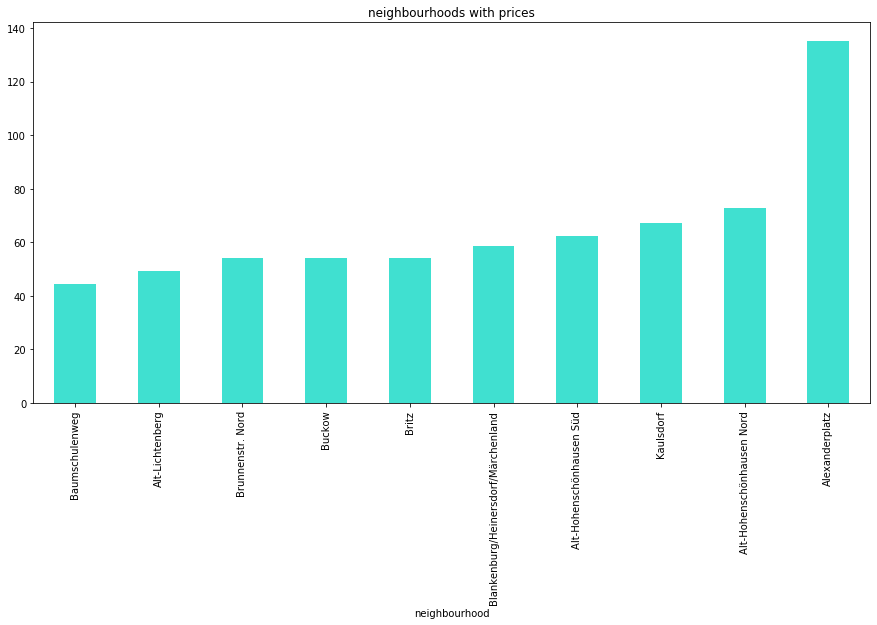

In [91]:
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
p = neighbourhoodPricesMostListingsTop.sort_values(by = 'price')
p.plot(x = "neighbourhood", y = "price", kind='bar', color = 'turquoise', figsize =(15,7), 
       title = 'neighbourhoods with prices', legend = False)

We can see, few neighbourhoods are costlier than others. But, we should check if it's the neighbourhood that causes more price or some other factor

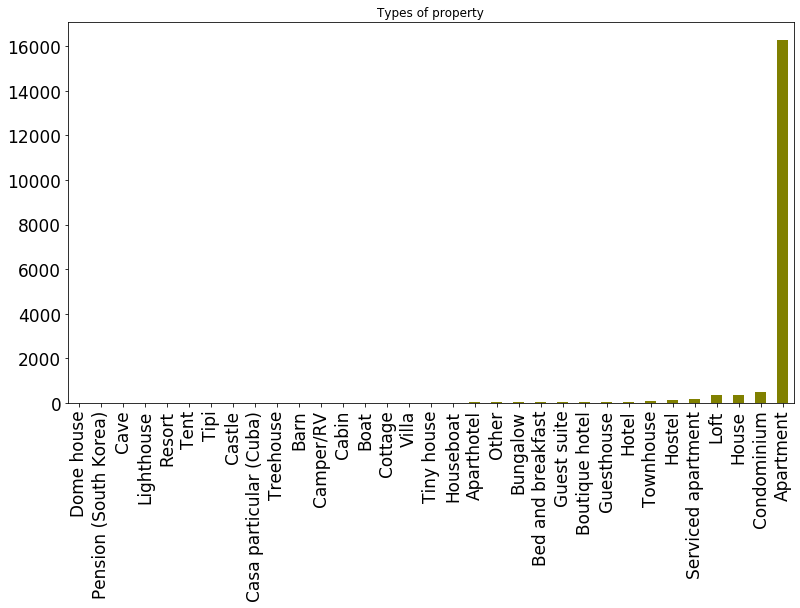

In [99]:
propertyType = listingsSummary.property_type
p = Counter(propertyType)

dfProperty = pd.DataFrame.from_dict(p, orient='index').sort_values(by=0)
dfProperty.columns = ['property_type']
dfProperty.plot.bar(y= 'property_type', color = 'olive',fontsize = 17, legend = False, figsize= (13, 7),
                     title = "Types of property")

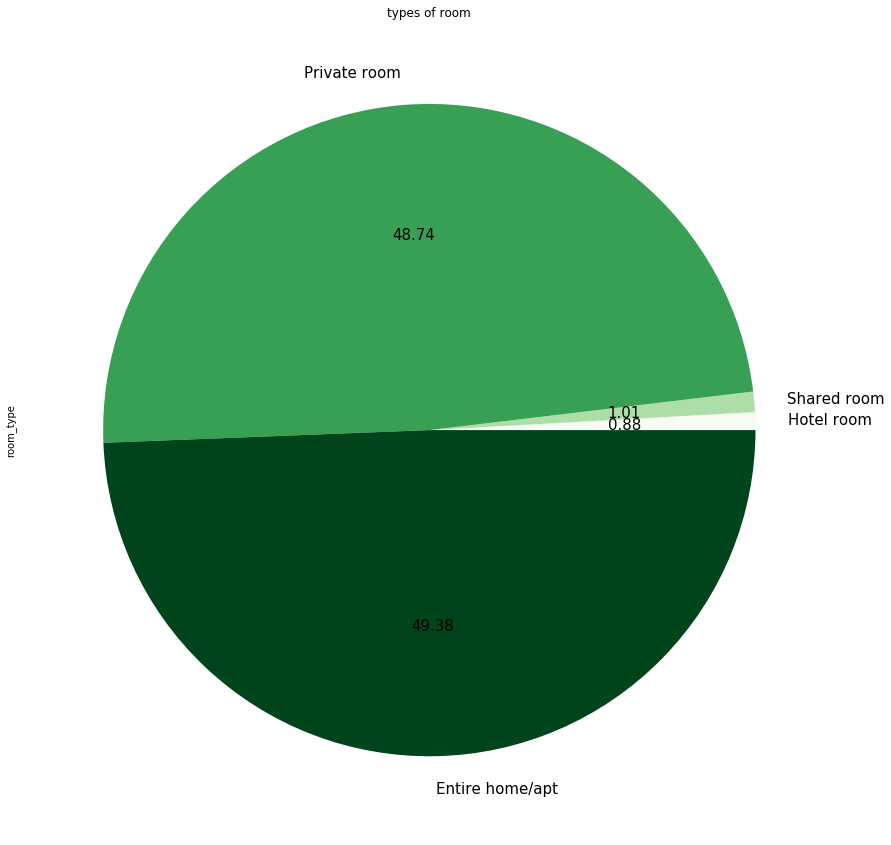

In [97]:
room = listingsSummary.room_type
r = Counter(room)
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
DFroom = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
DFroom.columns = ['room_type']
DFroom.plot.pie(y = 'room_type', colormap = 'Greens', figsize=(15,15), fontsize = 15, autopct = '%.2f',
                 legend = False, title = 'types of room')

Let's select property according to types, and price

In [100]:
roomProperty = listingsSummary[['property_type', 'room_type', 'price']]
roomProperty.head(10)

,property_type,room_type,price
0,Apartment,Entire home/apt,90
1,Apartment,Private room,28
2,Loft,Entire home/apt,125
3,Apartment,Private room,33
4,Apartment,Entire home/apt,180
6,Apartment,Entire home/apt,90
8,Loft,Entire home/apt,129
9,Apartment,Entire home/apt,70
10,Apartment,Entire home/apt,98
11,Apartment,Entire home/apt,160


Let's groupby and aggregate according to price

In [101]:
propertyRoomGrouped = roomProperty.groupby(['property_type', 'room_type']).mean()

# replace nan with 0
propertyRoomGrouped.fillna(0.00, inplace=True)

# resetting the index
propertyRoomGrouped = propertyRoomGrouped.reset_index()

# pivoting the table based on the 3 factors, in order.
propertyRoomGrouped = propertyRoomGrouped.pivot('property_type', 'room_type', 'price')

propertyRoomGrouped

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Aparthotel,118.750000,143.500000,122.666667,NaN
Apartment,85.873266,NaN,41.140648,35.008696
Barn,NaN,NaN,26.750000,NaN
Bed and breakfast,NaN,117.500000,53.541667,20.000000
Boat,143.400000,NaN,NaN,98.000000
Boutique hotel,NaN,525.958333,101.647059,30.000000
Bungalow,79.842105,NaN,29.333333,NaN
Cabin,75.600000,NaN,NaN,NaN
Camper/RV,42.666667,NaN,31.000000,NaN


Let's go to the data setting for Models

In [203]:

data = listingsSummary[['price','room_type', 'accommodates','bathrooms','bedrooms','beds','review_scores_rating',
          'instant_bookable', 'cancellation_policy', 'amenities']]


#data = listingsSummary[['price','amenities']]

In [204]:
# cancellation policy and instant bookable factors are little bit more complicated.
# we use pandas get_dummies function to convert the categorical variable into indicator variables

cancel_policy = pd.get_dummies(data.cancellation_policy).astype(int)
instant_booking = pd.get_dummies(data.instant_bookable, prefix = 'instant_booking').astype(int)
room_type = pd.get_dummies(data.room_type).astype(int)

# ib has 2 columns, so we can just drop one of them.
instant_booking = instant_booking.drop('instant_booking_f', axis = 1)

In [205]:
# we drop the original columns and replace them with indicator columns
data = data.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
#data = data.drop([ 'instant_bookable', 'room_type'], axis = 1)
data = pd.concat((data, cancel_policy, instant_booking, room_type), axis = 1)
#data = pd.concat((data, instant_booking, room_type), axis = 1)

In [206]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in data.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

data.amenities = amenities_list


In [207]:
data.head(3)

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_t,Entire home/apt,Hotel room,Private room,Shared room
0,90,4,1.0,1.0,2.0,93.0,14,0,0,0,1,0,0,0,1,0,0,0
1,28,1,1.0,1.0,1.0,89.0,30,0,0,0,1,0,0,0,0,0,1,0
2,125,2,1.0,1.0,1.0,99.0,16,0,1,0,0,0,0,0,1,0,0,0


In [208]:
data.describe()

,price,accommodates,bathrooms,bedrooms,beds,review_scores_rating,amenities,flexible,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_t,Entire home/apt,Hotel room,Private room,Shared room
count,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000,18184.000000
mean,69.710460,2.777387,1.112626,1.258194,1.687637,94.729542,15.418390,0.324131,0.342169,0.000110,0.331775,0.000770,0.001045,0.348988,0.493786,0.008799,0.487352,0.010064
std,159.992242,1.634657,0.364050,0.605969,1.250107,7.653009,10.852272,0.468062,0.474449,0.010487,0.470864,0.027737,0.032309,0.476663,0.499975,0.093392,0.499854,0.099815
min,1.000000,1.000000,0.500000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2.000000,1.000000,1.000000,1.000000,93.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2.000000,1.000000,1.000000,1.000000,97.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,4.000000,1.000000,1.000000,2.000000,100.000000,22.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,9000.000000,16.000000,8.500000,12.000000,22.000000,100.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [209]:
import sklearn.metrics as metrics
#from sklearn.grid_search import GridSearchCV
#from sklearn.grid_search import RandomizedSearchCV
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection 
#https://stackoverflow.com/questions/30667525/importerror-no-module-named-sklearn-cross-validation
from sklearn import linear_model
from sklearn import ensemble


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

In [229]:
# splitting the training and test sets with a 60% and 40% size of original
split_data = data.drop(['price'], axis = 1)

#train1, test1, train2, test2 = model_selection.train_test_split(split_data,data.price, test_size=0.1,
 #                                                               train_size = 0.9, random_state=0)

#https://stackoverflow.com/questions/24147278/how-do-i-create-test-and-train-samples-from-one-dataframe-with-pandas
x_train,x_test,y_train,y_test = model_selection.train_test_split(split_data,data.price, test_size=0.1,
                                                                train_size = 0.9, random_state=0)
    

In [230]:
# mean of prices
mean = np.mean(data.price)

# standard deviation to compare 
std = np.std(data.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

mean: 69.71045974483062
standard deviation: 159.98784231378616


In [275]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train, y_train)
LR_medianAbsoluteError = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print("Linear Regression: median absolute error " + str(LR_medianAbsoluteError))
LR_meanAbsoluteError = metrics.mean_absolute_error(test2, linear_reg.predict(test1))
print("Linear Regression: mean absolute error " + str(LR_meanAbsoluteError))
LR_RMSE = np.sqrt(metrics.mean_squared_error(test2, linear_reg.predict(test1)))
print("Linear Regression: RMSE " + str(LR_RMSE))
LR_R2score = metrics.r2_score(test2, linear_reg.predict(test1))
print ("Linear Regression: R2 score " + str(LR_R2score))
print('Model accuracy on train set: {:.2f}'.format(linear_reg.score(x_train, y_train)))
print('Model accuracy on test set: {:.2f}'.format(linear_reg.score(x_test, y_test)))

Linear Regression: median absolute error 15.147959473573316
Linear Regression: mean absolute error 28.718172190639223
Linear Regression: RMSE 129.37655180216433
Linear Regression: R2 score 0.06638804208797744
Model accuracy on train set: 0.12
Model accuracy on test set: 0.07


In [276]:
# linear regression testing
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_test, y_test)
LR_medianAbsoluteError = metrics.median_absolute_error(test2, linear_reg.predict(test1))
print("Linear Regression: median absolute error " + str(LR_medianAbsoluteError))
LR_meanAbsoluteError = metrics.mean_absolute_error(test2, linear_reg.predict(test1))
print("Linear Regression: mean absolute error " + str(LR_meanAbsoluteError))
LR_RMSE = np.sqrt(metrics.mean_squared_error(test2, linear_reg.predict(test1)))
print("Linear Regression: RMSE " + str(LR_RMSE))
LR_R2score = metrics.r2_score(test2, linear_reg.predict(test1))
print ("Linear Regression: R2 score " + str(LR_R2score))
print('Model accuracy on train set: {:.2f}'.format(linear_reg.score(x_train, y_train)))
print('Model accuracy on test set: {:.2f}'.format(linear_reg.score(x_test, y_test)))

Linear Regression: median absolute error 16.086011814306346
Linear Regression: mean absolute error 28.320278681598424
Linear Regression: RMSE 126.7935892720654
Linear Regression: R2 score 0.10329445830398853
Model accuracy on train set: 0.09
Model accuracy on test set: 0.10


In [277]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(x_train, y_train)
ridge_error = metrics.median_absolute_error(test2, ridge.predict(test1))
print ("Ridge: median absolute error " + str(ridge_error))
ridge_error = metrics.mean_absolute_error(test2, ridge.predict(test1))
print ("Ridge: mean absolute error " + str(ridge_error))
Ridge_RMSE = np.sqrt(metrics.mean_squared_error(test2, ridge.predict(test1)))
print ("Ridge: RMSE " + str(Ridge_RMSE))
Ridge_R2score = metrics.r2_score(test2, ridge.predict(test1))
print ("Ridge: R2 score " + str(Ridge_R2score))
print('Model accuracy on train set: {:.2f}'.format(ridge.score(x_train, y_train)))
print('Model accuracy on test set: {:.2f}'.format(ridge.score(x_test, y_test)))

Ridge: median absolute error 15.140536185040801
Ridge: mean absolute error 28.773163320334728
Ridge: RMSE 129.36975226635977
Ridge: R2 score 0.06648617364319864
Model accuracy on train set: 0.12
Model accuracy on test set: 0.07


In [234]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(x_test, y_test)
ridge_error = metrics.median_absolute_error(test2, ridge.predict(test1))
print ("Ridge: median absolute error " + str(ridge_error))
ridge_error = metrics.mean_absolute_error(test2, ridge.predict(test1))
print ("Ridge: mean absolute error " + str(ridge_error))
Ridge_RMSE = np.sqrt(metrics.mean_squared_error(test2, ridge.predict(test1)))
print ("Ridge: RMSE " + str(Ridge_RMSE))
Ridge_R2score = metrics.r2_score(test2, ridge.predict(test1))
print ("Ridge: R2 score " + str(Ridge_R2score))

Ridge: median absolute error 16.170663517939772
Ridge: mean absolute error 28.325268068627206
Ridge: RMSE 126.81247074250683
Ridge: R2 score 0.10302737256366967


In [278]:
#https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn
decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(x_train, y_train)
decisionTree_medianAbsoluteError = metrics.median_absolute_error(test2, decisionTree.predict(test1))
print ("Decision tree: median absolute error  " + str(decisionTree_medianAbsoluteError))
decisionTree_meanAbsoluteError = metrics.mean_absolute_error(test2, decisionTree.predict(test1))
print ("Decision tree: mean absolute error " + str(decisionTree_meanAbsoluteError))
DT_RMSE = np.sqrt(metrics.mean_squared_error(test2, decisionTree.predict(test1)))
print ("Decision tree: RMSE " + str(DT_RMSE))
DT_R2score = metrics.r2_score(test2, decisionTree.predict(test1))
print ("Decision tree: R2 score " + str(DT_R2score))
print('Model accuracy on train set: {:.2f}'.format(decisionTree.score(x_train, y_train)))
print('Model accuracy on test set: {:.2f}'.format(decisionTree.score(x_test, y_test)))

Decision tree: median absolute error  17.0
Decision tree: mean absolute error 38.10314660586676
Decision tree: RMSE 250.37767155243955
Decision tree: R2 score -2.49660403394318
Model accuracy on train set: 0.99
Model accuracy on test set: -2.50


In [236]:
#https://stackoverflow.com/questions/39158003/confused-about-random-state-in-decision-tree-of-scikit-learn
decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(x_test, y_test)
decisionTree_medianAbsoluteError = metrics.median_absolute_error(test2, decisionTree.predict(test1))
print ("Decision tree: median absolute error  " + str(decisionTree_medianAbsoluteError))
decisionTree_meanAbsoluteError = metrics.mean_absolute_error(test2, decisionTree.predict(test1))
print ("Decision tree: mean absolute error " + str(decisionTree_meanAbsoluteError))
DT_RMSE = np.sqrt(metrics.mean_squared_error(test2, decisionTree.predict(test1)))
print ("Decision tree: RMSE " + str(DT_RMSE))
DT_R2score = metrics.r2_score(test2, decisionTree.predict(test1))
print ("Decision tree: R2 score " + str(DT_R2score))

Decision tree: median absolute error  0.0
Decision tree: mean absolute error 5.870271473075211
Decision tree: RMSE 104.19143305779377
Decision tree: R2 score 0.39449283787030587


In [279]:
RF_regr = RandomForestRegressor(n_estimators = 50, random_state = 0) 
RF_regr.fit(x_train, y_train)
randomForest_medianAbsoluteError = metrics.median_absolute_error(test2, RF_regr.predict(test1))
print ("Random forest: median absolute error  " + str(randomForest_medianAbsoluteError))
randomForest_meanAbsoluteError = metrics.mean_absolute_error(test2, RF_regr.predict(test1))
print ("Random forest: mean absolute error " + str(randomForest_meanAbsoluteError))
RF_RMSE = np.sqrt(metrics.mean_squared_error(test2, RF_regr.predict(test1)))
print ("Random forest: RMSE " + str(RF_RMSE))
RF_R2score = metrics.r2_score(test2, RF_regr.predict(test1))
print ("Random forest: R2 score " + str(RF_R2score))
print('Model accuracy on train set: {:.2f}'.format(RF_regr.score(x_train, y_train)))
print('Model accuracy on test set: {:.2f}'.format(RF_regr.score(x_test, y_test)))

Random forest: median absolute error  15.334166666666675
Random forest: mean absolute error 31.058277473214492
Random forest: RMSE 161.40526490178266
Random forest: R2 score -0.45308378185452014
Model accuracy on train set: 0.89
Model accuracy on test set: -0.45


In [238]:
RF_regr = RandomForestRegressor(n_estimators = 50, random_state = 0) 
RF_regr.fit(x_test, y_test)
randomForest_medianAbsoluteError = metrics.median_absolute_error(test2, RF_regr.predict(test1))
print ("Random forest: median absolute error  " + str(randomForest_medianAbsoluteError))
randomForest_meanAbsoluteError = metrics.mean_absolute_error(test2, RF_regr.predict(test1))
print ("Random forest: mean absolute error " + str(randomForest_meanAbsoluteError))
RF_RMSE = np.sqrt(metrics.mean_squared_error(test2, RF_regr.predict(test1)))
print ("Random forest: RMSE " + str(RF_RMSE))
RF_R2score = metrics.r2_score(test2, RF_regr.predict(test1))
print ("Random forest: R2 score " + str(RF_R2score))

Random forest: median absolute error  5.789999999999999
Random forest: mean absolute error 15.536189702332365
Random forest: RMSE 107.15625397659004
Random forest: R2 score 0.35954251217257094


In [239]:
for k in range(2, 21):
    print("Starting for value of k = " + str(k))
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(x_train, y_train)
    knn_medianAbsoluteError = metrics.median_absolute_error(test2, knn.predict(test1))
    print ("KNN: median absolute error  " + str(knn_medianAbsoluteError))
    knn_meanAbsoluteError = metrics.mean_absolute_error(test2, knn.predict(test1))
    print ("KNN: mean absolute error  " + str(knn_meanAbsoluteError))
    knn_RMSE = np.sqrt(metrics.mean_squared_error(test2, knn.predict(test1)))
    print ("KNN: RMSE " + str(knn_RMSE))
    knn_R2score = metrics.r2_score(test2, knn.predict(test1))
    print ("KNN: R2 score " + str(knn_R2score))

Starting for value of k = 2
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.04507774030066469
Starting for value of k = 3
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.04507774030066469
Starting for value of k = 4
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.04507774030066469
Starting for value of k = 5
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.04507774030066469
Starting for value of k = 6
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.04507774030066469
Starting for value of k = 7
KNN: median absolute error  15.0
KNN: mean absolute error  31.34194612424409
KNN: RMSE 130.84477288158783
KNN: R2 score 0.0450777403

In [240]:
for k in range(2, 21):
    print("Starting for value of k = " + str(k))
    knn = KNeighborsClassifier(n_neighbors = 2)
    knn.fit(x_test, y_test)
    knn_medianAbsoluteError = metrics.median_absolute_error(test2, knn.predict(test1))
    print ("KNN: median absolute error  " + str(knn_medianAbsoluteError))
    knn_meanAbsoluteError = metrics.mean_absolute_error(test2, knn.predict(test1))
    print ("KNN: mean absolute error  " + str(knn_meanAbsoluteError))
    knn_RMSE = np.sqrt(metrics.mean_squared_error(test2, knn.predict(test1)))
    print ("KNN: RMSE " + str(knn_RMSE))
    knn_R2score = metrics.r2_score(test2, knn.predict(test1))
    print ("KNN: R2 score " + str(knn_R2score))

Starting for value of k = 2
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.05999960942346316
Starting for value of k = 3
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.05999960942346316
Starting for value of k = 4
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.05999960942346316
Starting for value of k = 5
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.05999960942346316
Starting for value of k = 6
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.05999960942346316
Starting for value of k = 7
KNN: median absolute error  1.0
KNN: mean absolute error  21.416712479384277
KNN: RMSE 129.81844005255974
KNN: R2 score 0.0599996094

We can see the errors that came for all the algorithms. Let's enhance our learnings and implement

1. Bagging regressor
2. Gradient boost regressor
3. ada boost regressor

In [253]:
from sklearn.metrics import fbeta_score, make_scorer
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [254]:
meanAbsoluteError = make_scorer(mean_absolute_error)

In [255]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=meanAbsoluteError)
preds = baggingRegressor.fit(x_train, y_train)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

BaggingRegressor: $36.84220397805849


In [256]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=meanAbsoluteError)
preds = baggingRegressor.fit(x_test, y_test)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

BaggingRegressor: $36.286586521041066


In [258]:
meanSquaredError = make_scorer(mean_squared_error)

In [259]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=meanSquaredError)
preds = baggingRegressor.fit(x_train, y_train)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

BaggingRegressor: $25832.6588132069


In [260]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=meanSquaredError)
preds = baggingRegressor.fit(x_test, y_test)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

C:\Users\Raghvendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BaggingRegressor: $17576.75249964431


In [261]:
r2Score = make_scorer(r2_score)

In [262]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=r2Score)
preds = baggingRegressor.fit(x_train, y_train)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

BaggingRegressor: $0.31853861338004663


In [263]:
# 1. Bagging regressor

parameterNames = ["n_estimators", "max_features", "bootstrap", "oob_score"]
parameterValues = [[100,500,1000], [1,5,10], [True, False], [False]]

parametersFinal = dict(zip(parameterNames, parameterValues))
baggingRegressor = GridSearchCV(ensemble.BaggingRegressor(), cv = 3, param_grid = parametersFinal,
                                scoring=r2Score)
preds = baggingRegressor.fit(x_test, y_test)
br_best_estimator = baggingRegressor.best_estimator_
print("BaggingRegressor: " + "$" + str(abs(baggingRegressor.best_score_)))

BaggingRegressor: $0.2264498496593887


In [266]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=meanAbsoluteError)
preds = gradientBoostingRegressor.fit(x_train, y_train)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

GradientBoostingRegressor: $37.41615556508386


In [267]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=meanAbsoluteError)
preds = gradientBoostingRegressor.fit(x_test, y_test)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

GradientBoostingRegressor: $35.70564203839602


C:\Users\Raghvendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [268]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=meanSquaredError)
preds = gradientBoostingRegressor.fit(x_train, y_train)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

GradientBoostingRegressor: $26184.48937058045


In [269]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=meanSquaredError)
preds = gradientBoostingRegressor.fit(x_test, y_test)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

GradientBoostingRegressor: $17762.35745995721


C:\Users\Raghvendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [270]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=r2Score)
preds = gradientBoostingRegressor.fit(x_train, y_train)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

GradientBoostingRegressor: $0.37345968751777725


In [271]:
# 2. Gradient boosting regressor

parameterNames = ["n_estimators", "max_depth", "learning_rate", "loss", "min_samples_split"]
parameterValues = [[100,300,500], [1,2,3,4], [0.01, 0.02], ['ls', 'lad'], [2,3]]

parametersFinal = dict(zip(parameterNames, parameterValues))
gradientBoostingRegressor = GridSearchCV(ensemble.GradientBoostingRegressor(), cv = 3, param_grid = parametersFinal, 
                   scoring=r2Score)
preds = gradientBoostingRegressor.fit(x_test, y_test)
gbr_best_estimator = gradientBoostingRegressor.best_estimator_
print("GradientBoostingRegressor: " + "$" + str(abs(gradientBoostingRegressor.best_score_)))

C:\Users\Raghvendra\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingRegressor: $0.2968270452341068
